# <font style="color:rgb(50,120,229)">Introduction</font>

Instagram is a photo-enhancing and sharing app for mobile phones. The name came from “Instant Camera and TeleGram”. It allows users to apply different filters to their pictures and share it. It was launched in September 2010 and was an instant hit among its users with 1 Million registered users within 2 months and 10 million in a year. It was acquired by Facebook in 2012 for $1 Billion. [**You know what is cool? A billion dollars!**](https://www.youtube.com/watch?v=4e0n7vTLz1U)

There are many photographic filters present in the app like Clarendon, Gingham, Lark, Moon, X-Pro II, Nashville, Sutro, Kelvin and many more. Most filters can be designed using the method described in color enhancement using curves section. 

In this part of the project, You will design 2 instagram-like filter on your own. 

1. Pencil Sketch Filter - This will generate a sketch of the given image as shown in the output below.
1. Cartoon Filter using - This should produce a cartoonified output of the input image.

Given below is the expected output for the two filters. Looking at the output, you should be able to figure out what processing can produce those results.

You can also come up with your own filter and show them in the discussion forum. 

| <center> <a href="https://www.dropbox.com/s/0w8j6ejacfw3lwt/trump.jpg?dl=1"><img src = "https://www.dropbox.com/s/0w8j6ejacfw3lwt/trump.jpg?dl=1" width=500/></a></center> | <center> <a href="https://www.dropbox.com/s/yegx6u3bx8otvh5/pencilSketch.jpg?dl=1"><img src = "https://www.dropbox.com/s/yegx6u3bx8otvh5/pencilSketch.jpg?dl=1" width=500/></a></center> | <center> <a href="https://www.dropbox.com/s/rttwy9wszo76jse/cartoon.jpg?dl=1"><img src = "https://www.dropbox.com/s/rttwy9wszo76jse/cartoon.jpg?dl=1" width=500/></a></center> | 
| -------- | -------- | -------- | 
| <center>Original Image</center>     | <center>Pencil Sketch Result</center>     | <center>Cartoon Filter Result</center>     |


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [3]:
def cartoonify(image, arguments=0):
    # convert to gray scale
    grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # apply gaussian blur
    grayImage = cv2.GaussianBlur(grayImage, (3, 3), 0)

    # detect edges
    laplacian = cv2.Laplacian(grayImage, -1, ksize=5)
    laplacian = 255 - laplacian

    # threshold image
    ret, pencilSketchImage = cv2.threshold(laplacian, 150, 255, cv2.THRESH_BINARY)

    # blur image heavily to remove texture using edgePreservingFilter
    edgePreservingImage = cv2.edgePreservingFilter(image)

    # combine blurred image using the pencilsketch image as mask
    cartoonImage = cv2.bitwise_and(edgePreservingImage, edgePreservingImage, mask = pencilSketchImage)

    return cartoonImage

In [4]:
def pencilSketch(image, arguments=0):
    # convert to gray scale
    grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # apply gaussian blur
    blurImage = cv2.GaussianBlur(grayImage, (3,3), 0, 0)

    # detect edges
    kernelSize = 5
    laplacian = cv2.Laplacian(blurImage, cv2.CV_32F, ksize = kernelSize, scale = 1, delta = 0)
    laplacian = 255 - laplacian
    
    # threshold image
    ret, pencilSketchImage = cv2.threshold(laplacian, 150, 255, cv2.THRESH_BINARY)

    return pencilSketchImage

In [5]:
imagePath = "trump.jpg"
image = cv2.imread(imagePath)

cartoonImage = cartoonify(image)
pencilSketchImage = pencilSketch(image)

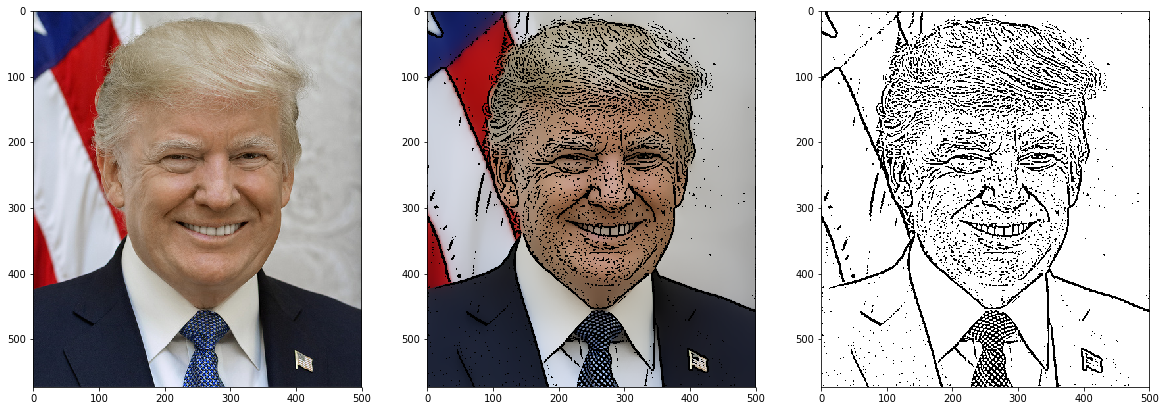

In [6]:
plt.figure(figsize=[20,10])
plt.subplot(131);plt.imshow(image[:,:,::-1]);
plt.subplot(132);plt.imshow(cartoonImage[:,:,::-1]);
plt.subplot(133);plt.imshow(pencilSketchImage);